# Problem Set 2 - Danling Ma

# 1. Write a short Python program to explore some simulated classification data. 

First generate a vector of length nmc=100 of uniform random numbers. Then use these to generate y values of 0 or 1, where the x value is the probability of y = 1. Here is some code to do this.

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

# These lines of code generate a feature and a class randomly with a monte-carlo
# The features are uniform(0,1)
# Class is a (0,1) integer where prob(1) = X[i]
nmc = 100
# X needs to be a matrix with nmc rows, and 1 column
X = np.random.uniform(size=(nmc,1))
Y = np.zeros(nmc,dtype=int)+( np.random.uniform(size=nmc)<X)
# This is the code for splitting into test/train sets, note test_size argument
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)

## Write a Python program to do nearest neighbor prediction for y as we did in class. Divide your data (50/50) into a training and test set.

## 1.1 
Write a k nearest neighbor predictor for your data, using k=3. Report the accuracy both for the training and testing sample.


In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print('Train set accuracy:', knn.score(X_train, Y_train))
print('Test set accuracy:', knn.score(X_test, Y_test))

Train set accuracy: 0.76
Test set accuracy: 0.34


## 1.2 
Now repeat the figure we tried in class which showed forecast accuracy in training and testing sets as k varies. Plot the accuracy for nearest neighbor predictors across the range of 1 to 50. Do this for both the training and testing data as we did in class.

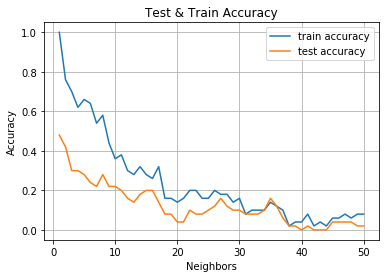

In [26]:
import matplotlib.pyplot as plt

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 51, 1)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.title("Test & Train Accuracy")
plt.legend()
plt.grid()
plt.show()

# 2. This problem explores linear regression along with ridge and lasso in a simple generated monte-carlo problem. 
First, to get things working you will need to load these routines into python.

In [27]:
# Load helpers
# Will try to just load what I need on this
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt

# Function to generate linear data experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if eps = 1)
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller betas to zero
    beta[abs(beta)<1.0]=0.
    # bused is the fraction of nonzero beta's
    betaUsed= np.sum( beta != 0)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # Python 2.7 users, this is the nifty new
    # python 3.6 notation for matrices
    # For nonmatrix students, this is the sum of the betas's time each X(m)
    # across all i
    y = X @ beta + eps
    #sum of βi*X1i
    return X,y, betaUsed

## 2.1 
First, generate one set of X,y data with sample length 300, with
M = 50 forecast variables, and noise=1. Do a short (iterations 100) monte-carlo run with the same set of data, but **different random train/test splits** (don’t use the random_state parameter since that fixes the random draws). Set the test_size = 0.5 for all problems here. On each split fit a linear regression and record the train and test score (R-squared). Report the mean and standard deviation for both of these across the 100 monte-carlos. (Python note: This involves a for loop across the 100 monte-carlo runs. Each iteration of the loop involves a new train/test split of the original data. Store results in either list, or (better) a numpy array.) The following block illustrates a shell of a monte-carlo program as an example. Many of the pieces are not included.

In [28]:
nmc = 100
rsquareVec_train = np.zeros(nmc)
rsquareVec_test = np.zeros(nmc)
X,y, betaUsed = genLinData(300,50,1.)

for i in range(nmc):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    rsquareVec_test[i] = reg.score(X_test,y_test)
    rsquareVec_train[i] = reg.score(X_train,y_train)

print("Train scores mean: ",np.mean(rsquareVec_train))
print("Train scores std: ",np.std(rsquareVec_train))
print("----------------------------------------")
print("Test scores mean: ",np.mean(rsquareVec_test))
print("Test scores std: ",np.std(rsquareVec_test))

Train scores mean:  0.6429777399571964
Train scores std:  0.03566216152565645
----------------------------------------
Test scores mean:  0.1493529088822266
Test scores std:  0.11566133404381587


## 2.2 
Run this regression once on a sample size of 100,000. Report train and test scores. Are they close? Why or why not?

In [47]:
X,y, betaUsed = genLinData(100000,50,1.)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Train scores: ",reg.score(X_train,y_train))
print("Test scores: ",reg.score(X_test,y_test))

Train scores:  0.3914433534791325
Test scores:  0.3906898393580548


* Yes.
  Based on the OLS esitmation assumptions, as the sample size increases, the OLS estimators will be unbiased and consistent, which means the liner model will more accurate. That's why the fraction of test set explained by the model(i.e. scores) closes to that of the train set.

## 2.3 
Now, run a monte-carlo (iterations 100) where on each run you **draw a new data set** (X,y)
from a sample size of 300 (M=50, noise = 1.0) using the above function. On each run estimate a linear model, and record the training and testing scores, and save them. Report the mean and standard deviation for these scores.

In [30]:
nmc = 100
rsquareVec_test = np.zeros(nmc)
rsquareVec_train = np.zeros(nmc)

for i in range(nmc):
    X,y, betaUsed = genLinData(300,50,1.0)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    rsquareVec_test[i] = reg.score(X_test,y_test)
    rsquareVec_train[i] = reg.score(X_train,y_train)

print("Train scores mean: ",np.mean(rsquareVec_train))
print("Train scores std: ",np.std(rsquareVec_train))
print("----------------------------------------")
print("Test scores mean: ",np.mean(rsquareVec_test))
print("Test scores std: ",np.std(rsquareVec_test))

Train scores mean:  0.6264920178545579
Train scores std:  0.05229135499812042
----------------------------------------
Test scores mean:  0.12780396300323374
Test scores std:  0.18332295470253734


## 2.4 
Simulate **one new data set** using the parameters from the last problem.
Now set up a Ridge regression. Set up a loop to sweep through alpha from 1 to 25 incremented by 1. Record the score for each ridge regression for each parameter. At the end, plot the R-squared scores for both the training and testing samples across the different values of alpha.


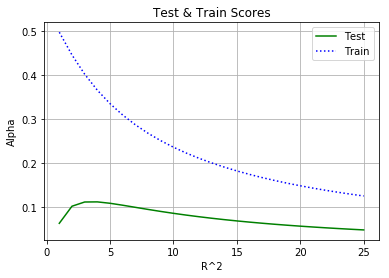

In [31]:
scoreVec_train = []
scoreVec_test = []

X,y, betaUsed = genLinData(300,50,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)


alphas = np.arange(1,26,1)
for alpha in alphas:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    scoreVec_train.append(ridge.score(X_train,y_train))
    scoreVec_test.append(ridge.score(X_test,y_test))

plt.plot(alphas, scoreVec_test, '-g', label='Test')
plt.plot(alphas, scoreVec_train, ':b',label='Train')
plt.xlabel("R^2")
plt.ylabel("Alpha")
plt.title("Test & Train Scores")
plt.grid()
plt.legend()

## 2.5 
Now repeat this for a Lasso regression. However, this time
sweep the alpha parameter from 0.01 through 0.03 incremented by 0.0005. Plot the two scores as you did in the last problem. Also, this time plot **the number of non zero coefficients estimated by Lasso** as a fraction of the **true non zero coefficients from the simulation**.

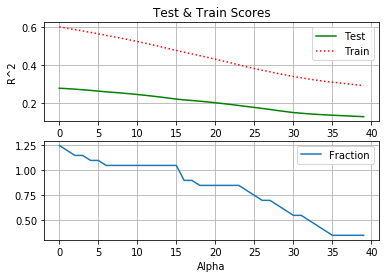

In [37]:
X,y, betaUsed = genLinData(300,50,1.0)
scoreVec_train = []
scoreVec_test = []
fraction = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

alphas = np.arange(0.01,0.03,0.0005)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)    
    scoreVec_train.append(lasso.score(X_train, y_train))
    scoreVec_test.append(lasso.score(X_test, y_test))
    fraction.append(np.sum(lasso.fit(X_train, y_train).coef_!=0)/betaUsed)
    
plt.figure(1)
plt.subplot(211)
plt.plot(scoreVec_test, '-g', label='Test')
plt.plot(scoreVec_train, ':b', color = 'red', label='Train')
plt.legend()
plt.title("Test & Train Scores")
plt.grid()
plt.ylabel("R^2")
plt.xlabel("Alpha")

plt.subplot(212)
plt.plot(fraction,label='Fraction')
plt.xlabel("Alpha")
plt.legend()
plt.grid()
plt.show()